### Μέλη Ομάδας:
Ον/μο1:  Οδυσσεύς-Δημήτριος Μπούφαλης

Αρ. Μητρώου 1:  el18118

Ον/μο2:  Γεώργιος Στεφανάκης

Αρ. Μητρώου 2:  el18436

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      length_true = len(y_true)
      length_pred = len(y_pred)
      assert length_true == length_pred
      counter = 0
      for i in range (length_true):
        if y_true[i] == y_pred[i]:
          counter = counter + 1
      
      acc = counter / length_true
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm
 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/ai-lab-3/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
from sklearn.model_selection import train_test_split
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below
X = pd.DataFrame() 
y = pd.DataFrame() 
data[output].replace(genres_to_id, inplace=True)
y = data.loc[:,output]
X = data.loc[:,inputs]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## Your code above
##################

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
shape = x_train.shape
print('x_train shape: ',shape)
shape = y_train.shape
print('y_train shape: ',shape)
shape = x_test.shape
print('x_test shape: ',shape)
shape = y_test.shape
print('y_test shape: ',shape)
## Your code above
##################

x_train shape:  (9471, 6)
y_train shape:  (9471,)
x_test shape:  (4060, 6)
y_test shape:  (4060,)


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of x_train, x_test columns

##################
## Your code below
print("Max and Min values for each attribute in x_train set: ")
x_train.describe().loc[['min','max']]

## Your code above
##################

Max and Min values for each attribute in x_train set: 


,acousticness,danceability,energy,instrumentalness,liveness,speechiness
min,0.000001,0.0645,0.0211,0.000,0.0173,0.0224
max,0.994000,0.9770,0.9980,0.974,0.9890,0.9220


In [ ]:
print("Max and Min values for each attribute in x_test set: ")
x_test.describe().loc[['min','max']]

Max and Min values for each attribute in x_test set: 


,acousticness,danceability,energy,instrumentalness,liveness,speechiness
min,0.000003,0.106,0.00259,0.000,0.0209,0.0226
max,0.994000,0.968,0.99900,0.986,0.9910,0.7950


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

Όπως μπορούμε να δούμε παραπάνω τα χαρακτηριστικά στο train και test set έχουν παρόμοιο εύρος. 

Οσον αφορά το εαν τα χαρακτηριστικά είναι κανονικοποιημένα στο εύρος [0,1] αυτό φαίνεται επίσης να ισχύει για όλα τα χαρακτηριστικα. 

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [ ]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidian"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      
      if self.distance=='euclidian':
        ##################
        ## Your code below
        dist = linalg.norm(row1 - row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - np.inner(row1, row2)/(linalg.norm(row1)*linalg.norm(row2))
        ## Your code above
        ##################
        pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for i in x:
        distances.append(self.get_distance(row, i)) 
    
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels =np.array([y[i] for i in self.get_knn(row)])
      
      ##################
      ## Your code below
      prediction = np.argmax(np.bincount(nn_labels))
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.772942455054524
recall: 0.7615342911358093
f1: 0.7614538239538239
accuracy: 0.76
Confusion matrix: 
[[25  8  1]
 [ 4 25  2]
 [ 3  6 26]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.772942455054524
recall: 0.7615342911358093
f1: 0.7614538239538239
accuracy: 0.76
Confusion matrix: 
[[25  8  1]
 [ 4 25  2]
 [ 3  6 26]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 8.96 s, sys: 968 ms, total: 9.93 s
Wall time: 9.12 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 749 ms, sys: 6.31 ms, total: 755 ms
Wall time: 758 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 18 ms, sys: 121 µs, total: 18.1 ms
Wall time: 21.7 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 9.06 s, sys: 988 ms, total: 10.1 s
Wall time: 9.21 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 744 ms, sys: 9.63 ms, total: 754 ms
Wall time: 753 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 22.1 ms, sys: 0 ns, total: 22.1 ms
Wall time: 22.2 ms


In [ ]:
knn = KNN(x_train, y_train, k=10, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.827950918398073
recall: 0.8128399746995573
f1: 0.8110902681492357
accuracy: 0.81
Confusion matrix: 
[[25  7  2]
 [ 1 28  2]
 [ 1  6 28]]


In [ ]:
knn = KNN(x_train, y_train, k=10, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.760191637630662
recall: 0.7425951025571519
f1: 0.7392629082284254
accuracy: 0.74
Confusion matrix: 
[[21  8  5]
 [ 2 26  3]
 [ 1  7 27]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.827950918398073
recall: 0.8128399746995573
f1: 0.8110902681492357
accuracy: 0.81
Confusion matrix: 
[[25  7  2]
 [ 1 28  2]
 [ 1  6 28]]


In [ ]:
knn = KNN(x_train, y_train, k=20, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7982873181349525
recall: 0.7852173127315442
f1: 0.7797797797797799
accuracy: 0.78
Confusion matrix: 
[[24  7  3]
 [ 2 29  0]
 [ 3  7 25]]


In [ ]:
knn = KNN(x_train, y_train, k=20, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7783560340212929
recall: 0.7533477907291949
f1: 0.7497268435483538
accuracy: 0.75
Confusion matrix: 
[[21  9  4]
 [ 1 27  3]
 [ 1  7 27]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 20
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7982873181349525
recall: 0.7852173127315442
f1: 0.7797797797797799
accuracy: 0.78
Confusion matrix: 
[[24  7  3]
 [ 2 29  0]
 [ 3  7 25]]


In [ ]:
knn = KNN(x_train, y_train, k=40, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.8159445918066607
recall: 0.7956898888587695
f1: 0.789546783625731
accuracy: 0.79
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  7 26]]


In [ ]:
knn = KNN(x_train, y_train, k=40, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7792252510760402
recall: 0.761922833649589
f1: 0.7598597123283932
accuracy: 0.76
Confusion matrix: 
[[22  9  3]
 [ 2 26  3]
 [ 1  6 28]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 40
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.8159445918066607
recall: 0.7956898888587695
f1: 0.789546783625731
accuracy: 0.79
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  7 26]]


In [ ]:
knn = KNN(x_train, y_train, k=80, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.8159445918066607
recall: 0.7956898888587695
f1: 0.789546783625731
accuracy: 0.79
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  7 26]]


In [ ]:
knn = KNN(x_train, y_train, k=80, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.8004126409017713
recall: 0.7748531670732809
f1: 0.7686567164179104
accuracy: 0.77
Confusion matrix: 
[[21 10  3]
 [ 0 29  2]
 [ 2  6 27]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 80
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.8159445918066607
recall: 0.7956898888587695
f1: 0.789546783625731
accuracy: 0.79
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  7 26]]


In [ ]:
knn = KNN(x_train, y_train, k=100, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.8285052032238829
recall: 0.8147375079063884
f1: 0.8086541086541087
accuracy: 0.81
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  5 28]]


In [ ]:
knn = KNN(x_train, y_train, k=100, distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.8085677749360615
recall: 0.7755218216318785
f1: 0.7648395619410112
accuracy: 0.77
Confusion matrix: 
[[19 10  5]
 [ 0 30  1]
 [ 1  6 28]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 100
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.8285052032238829
recall: 0.8147375079063884
f1: 0.8086541086541087
accuracy: 0.81
Confusion matrix: 
[[23  8  3]
 [ 1 30  0]
 [ 2  5 28]]


In [ ]:
knn = KNN(x_train, y_train, k=5, distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(4060)]
labels = [y_test[i] for i in range(4060)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.6994198317734129
recall: 0.6943808195739392
f1: 0.6948739721397573
accuracy: 0.6940886699507389
Confusion matrix: 
[[896 309 165]
 [226 973 139]
 [133 270 949]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:4060])

eval = Evaluate(y_test[:4060], y_pred)
eval.get_evaluation_report()

precision: 0.6991501783933273
recall: 0.6941316915221206
f1: 0.6946342489462957
accuracy: 0.6938423645320198
Confusion matrix: 
[[896 309 165]
 [227 972 139]
 [133 270 949]]


## Σχολιασμός
Βλέπουμε ότι η υλοποίηση του έτοιμου ταξινομητή KNN είναι πολύ πιο γρήγορη από 
την δικιά μας. Η διαφορά ωστόσο είναι πιο έντονη κυριώς μεταξύ του δικού μας KNN για ευκλείδια απόσταση όπου ο δικός μας ΚΝΝ είναι σημαντικά πιο αργός. Αντίθετα, ο δικός μας ΚΝΝ με cosine απόσταση είναι αρκετά γρήγορος, της τάξης των ms, όπως και η έτοιμη υλοποίηση η οποία όμως είναι πάλι λίγο πιο γρήγορη.

Εκτός αυτών, βλέπουμε ότι όταν αλλάζουμε το Κ από 5 σε 50 ο χρόνος εκπαίδευσης και πρόβλεψης του ταξινομητή μας δεν επηρεάζεται σχεδόν καθόλου. Αυτό είναι κάτι αναμενόμενο καθώς αυτό που είναι υπολογιστικά πιο κοστοβόρο είναι ο υπολογισμός των αποστάσεων μεταξύ των δίαφορων στοιχείων του dataset μας (μουσικά κομμάτια με συγκερκιμένα χαρακτηριστικά). Αυτό δεν επηρεάζεται από την τιμή του Κ. Από εκεί και πέρα το να επιλέξουμε τους Κ κοντινότερους γείτονες είναι μια διαδικασία που απαιτεί κάποιου είδους ταξινόμηση η οποία όμως έχει σημαντικά μικρότερη υπολογιστική πολυπλοκότητα.

Επιπλέον παρατηρούμε ότι τόσο ο δικός μας ταξινομητής (για ευκλείδια απόσταση) όσο και ο έτοιμος κάνουν τις ίδιες προβλέψεις κάτι που επιβεβαιώνει και την ορθότητα της υλοποίησης μας.Όταν χρησιμοποιούμε cosine distance βλέπουμε ότι έχουμε μικρή απόκλιση από τα αποτελέσματα της έτοιμης υλοποίησης και της δικής μας με ευκλείδια απόσταση. 

Γενικά παρατηρούμε ότι όσο αυξάνουμε το Κ το accuracy δεν μεταβάλλεται ιδιαίτερα κάτι το οποίο μπορεί να σημαίνει ότι στα 100 πρώτα κομμάτια του test_set που εξετάζουμε υπάρχουν κάποιες σαφείς ομαδοποιήσεις (clusters) και τα δεδομένα ταξινομούνται πάντα σχεδόν με τον ίδιο τρόπο όσους γείτονες και αν χρησιμοποιήσουμε.

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)


Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        pxC = self.pxC
        pC = self.pC
        x = self.x 
        y = self.y 
        for attr in range(x.shape[-1]):
          for song in range(len(y)):
            pxC[attr][y[song]] += x[song][attr]
        for genre in range(len(genres)):
          for attr in range(x.shape[-1]):
            pxC[attr][genre] /= pC[genre]*y.shape[0] 
        return pxC 
        ## Your code above
        ##################

    def predict(self, song):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        pC = self.pC
        x = self.x
        pxC = self.pxC
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
          pcX[i] = pC[i]
          for attr in range(x.shape[-1]):
            if song[attr] == 1:
              pcX[i] *= pxC[attr][i]
            elif song[attr] == 0:
              pcX[i] *= 1 - pxC[attr][i]
          ## Your code above
          ##################
      
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.7898962148962149
recall: 0.7625914882081865
f1: 0.7573448773448774
accuracy: 0.76
Confusion matrix: 
[[20  7  7]
 [ 0 27  4]
 [ 1  5 29]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7941798941798942
recall: 0.7629800307219662
f1: 0.7492577844690521
accuracy: 0.76
Confusion matrix: 
[[17  8  9]
 [ 1 28  2]
 [ 0  4 31]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 399 ms, sys: 0 ns, total: 399 ms
Wall time: 402 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 5.63 ms, sys: 0 ns, total: 5.63 ms
Wall time: 5.72 ms


In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:500]]
eval = Evaluate(y_test[:500], preds)
eval.get_evaluation_report()

precision: 0.7283924578717929
recall: 0.7035260280858058
f1: 0.6997866510739117
accuracy: 0.704
Confusion matrix: 
[[ 89  37  39]
 [ 12 123  34]
 [  3  23 140]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:500])

eval = Evaluate(y_test[:500], y_pred)
eval.get_evaluation_report()

precision: 0.7430754289190272
recall: 0.7112356184645341
f1: 0.7046172412299962
accuracy: 0.712
Confusion matrix: 
[[ 83  38  44]
 [ 10 130  29]
 [  1  22 143]]


In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:1500]]
eval = Evaluate(y_test[:1500], preds)
eval.get_evaluation_report()

precision: 0.6888849647299552
recall: 0.6712228437180352
f1: 0.6681464962831086
accuracy: 0.6693333333333333
Confusion matrix: 
[[282 129 105]
 [ 48 340 102]
 [ 15  97 382]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:1500])

eval = Evaluate(y_test[:1500], y_pred)
eval.get_evaluation_report()

precision: 0.72808288353919
recall: 0.7011417396886884
f1: 0.6928625671389327
accuracy: 0.698
Confusion matrix: 
[[259 138 119]
 [ 31 384  75]
 [  6  84 404]]


In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:3500]]
eval = Evaluate(y_test[:3500], preds)
eval.get_evaluation_report()

precision: 0.689898463700544
recall: 0.6714851551116209
f1: 0.6673475365536333
accuracy: 0.67
Confusion matrix: 
[[626 299 267]
 [113 814 222]
 [ 34 220 905]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:3500])

eval = Evaluate(y_test[:3500], y_pred)
eval.get_evaluation_report()

precision: 0.7188218332611873
recall: 0.6894708095706954
f1: 0.6799846478276069
accuracy: 0.6871428571428572
Confusion matrix: 
[[563 345 284]
 [ 74 905 170]
 [ 17 205 937]]


In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:4060]]
eval = Evaluate(y_test[:4060], preds)
eval.get_evaluation_report()

precision: 0.6901622413361558
recall: 0.6712152867288165
f1: 0.6673501493248728
accuracy: 0.6704433497536946
Confusion matrix: 
[[ 716  353  301]
 [ 133  942  263]
 [  38  250 1064]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:4060])

eval = Evaluate(y_test[:4060], y_pred)
eval.get_evaluation_report()

precision: 0.7209350739448079
recall: 0.6899800445772755
f1: 0.6812033110568363
accuracy: 0.6886699507389162
Confusion matrix: 
[[ 647  405  318]
 [  83 1057  198]
 [  20  240 1092]]


## Σχολιασμός


Παρατηρούμε ότι η δική μας υλοποίηση του Naive Bayes είναι πιο αργή από την έτοιμη υλοποίηση κάτι που ήταν αναμενόμενο καθώς στην έτοιμη υλοποίηση θα υπάρχουν πολλές βελτιστοποιήσεις. Επιπλέον, παρατηρούμε ότι ο δικός μας ταξινομητής έχει accuracy πολύ κοντα στο accuracy του έτοιμου ταξινομητή κάτι το οποίο σημαίνει ότι η υπόθεση για κανονική κατανομή των δεδομένων είναι λίγο καλύτερη από την υπόθεση δεσμευμένης ανεξαρτησίας που κάναμε. Σε κάθε περίπτωση όμως φαίνεται ότι και η υπόθεση δεσμευμένης ανεξαρτησίας προσεγγίζει αρκετά καλα την πραγματικότητα όπως και η υπόθεση για κανονική κατανομή αφού πετυχαίνουμε accuracy της τάξης του 67-68% σε όλο το test-set. Το accuracy αυτό είναι λίγο μικρότερο από το accuracy που πετυχαίνουν οι ταξινομητές ΚΝΝ ωστόσο ο πολύ μικρότερος χρόνος εκτέλεσης του Naive-Bayes σε σχέση με τους ταξινομητές ΚΝΝ αποτελεί πολύ σημαντικό πλεονέκτημα.

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        output = np.dot(input,self.weights) + self.biases

        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
          activations.append(l.forward(input))  
          input = activations[-1]

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 24
Train accuracy: 0.5218033998521804
Val accuracy: 0.5224137931034483


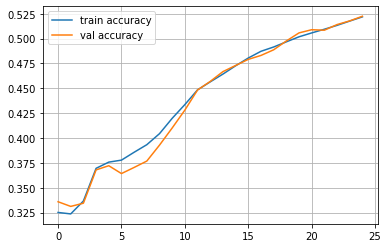

precision: 0.5274164798985171
recall: 0.52205214791464
f1: 0.5233526737030224
accuracy: 0.5224137931034483
Confusion matrix: 
[[774 235 361]
 [226 632 480]
 [255 382 715]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train, y_train)   
    
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

Epoch 999
Train accuracy: 0.7192482314433534
Val accuracy: 0.7226600985221675


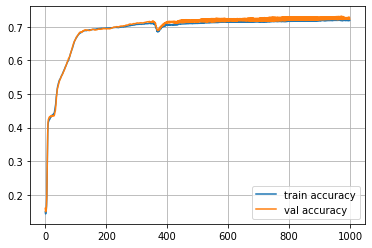

precision: 0.7513398148873695
recall: 0.7237892874873157
f1: 0.7216959473456276
accuracy: 0.7226600985221675
Confusion matrix: 
[[ 800  397  173]
 [  96 1166   76]
 [  53  331  968]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(1000):
    network.fit(x_train, y_train)   
    
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7495960951089157
recall: 0.7403343959554508
f1: 0.7392470580383038
accuracy: 0.7396551724137931
Confusion matrix: 
[[ 874  316  180]
 [ 139 1078  121]
 [  67  234 1051]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 1000
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7544811309081795
recall: 0.749468491493869
f1: 0.7487758679643308
accuracy: 0.7490147783251232
Confusion matrix: 
[[ 917  274  179]
 [ 160 1041  137]
 [  61  208 1083]]


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


H διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα από την δική μας όπως ήταν αναμενόμενο. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές, δίνοντας διαφορετικό μέγεθος σε κάθε επίπεδο καθώς και να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. Όταν δοκιμάσαμε ωστόσο να αυξήσουμε τις εποχές σε 1000 (με κόστος προφανώς στον χρόνο εκπαίδευσης) είδαμε ότι τόσο η δική μας υλοποίηση όσο και η έτοιμη είχαν accuracy πολύ κοντινά μεταξύ τους. Βλέπουμε όμως ότι η ακρίβεια του MLP σε όλο το test set είναι 73.2% κάτι που είναι οριακά καλύτερο τόσο από την ακρίβεια του ΚΝΝ σε όλο το test set όσο και από την ακρίβεια του Naive Bayes σε όλο το test set. Προφανώς στο MLP όσο περισσότερες εποχές χρησιμοποιούμε θα βελτιώνονται οι μετρικές μας ωστόσο αυτό θα απαιτεί περισσότερο χρόνο για training αφού θα έχουμε πολλές εποχές.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Απάντηση/Σχολιασμός:

Για απλά προβλήματα στα οποία η παραδοχή δεσμευμένης ανεξαρτησίας ισχύει (ή είναι πολύ κοντά στην πραγματικότητα) η υλοποίηση του Naive Bayes που κάναμε φαίνεται να αποδίδει πολύ καλά καθώς το accuracy του είναι αρκετά υψηλό και η ταχύτητα εκτελεσής του είναι πολύ πιο γρήγορη σε σχέση με τους 2 άλλους ταξινομητές.

Από την άλλη ο αλγόριθμος KNN είναι πολύ απλός και έχει αρκετά εύκολη υλοποίηση αφού εξαρτάται μόνο από το είδος της απόστασης και το Κ. Ωστόσο για μεγάλα dataset ο χρόνος εκτέλεσης του είναι πολύ μεγάλος παρόλο που πετυχαίνει καλά αποτελέσματα (πολύ κοντά σε αυτά του naive-bayes όμως ο οποίος είναι σημαντικά πιο γρήγορος) όσον αφορά το accuracy στο δικό μας dataset. Επομένως, θα τον χρησιμοποιούσαμε σε κάποιο μικρό dataset. 


Ο Multi-Layer Perceptron είναι ένας γενικότερος ταξινομητής ο οποίος μπορεί να έχει πολύ καλά αποτελέσματα αφού εκπαιδευτεί στο dataset έχοντας την κατάλληλη δομή και χρόνο για το training. Πρόκειται βέβαια για έναν ταξινομητή που για να καταφέρει να συγκλίνει απαιτεί πολύ μεγάλο όγκο δεδομένων εκπαίδευσης. Στο δικό μας data set παρατηρούμε ότι η έτοιμη υλοποίηση του ακόμα και για 25 εποχές δίνει σε ολόκληρο test set λίγο καλύτερο accuracy και από τον Naive Bayes και από τον ΚΝΝ. Τέλος, ο MLP έχει το σημαντικό πλεονέκτημα ότι απαξ και εκπαιδευτεί (αυτό είναι που απαιτεί τον περισσότερο χρόνο) η διαδικασία της πρόβλεψης μετά είναι εύκολη αφού τα ζητούμενα βάρη κλπ θα έχουν ήδη υπολογιστεί.

